[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 4.2 MB/s 
     |████████████████████████████████| 3.3 MB 35.6 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 41.8 MB/s 
     |████████████████████████████████| 636 kB 37.4 MB/s 
     |████████████████████████████████| 1.2 MB 4.3 MB/s 


In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *
from plotting_helper import *
from common_helpers import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

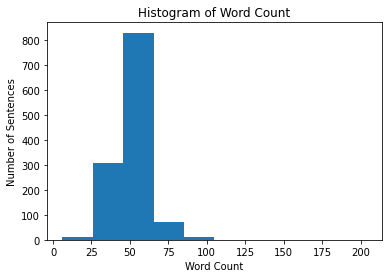

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [6]:
chk_point = 'google/muril-base-cased'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/909M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [8]:
txt_only_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.TXT,
                                       k_folds=5, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=2, clip_at=1.0, img_path=IMG_PATH, hidden_dim=150)

Running Text Only Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.696 / Validation : 0.691


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 9.157535 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.691
Time for epoch : 9.117739 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.691
Time for epoch : 8.934543 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.690
Time for epoch : 8.6602 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.687
Time for epoch : 8.690095 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.676 / Validation : 0.602
Time for epoch : 12.877703 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.686 / Validation : 0.519
Time for epoch : 10.549359 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.666 / Validation : 0.584

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    50  of     62.
Evaluating
Losses - Train : 0.704 / Validation : 0.693
Time for epoch : 4.993455 seconds
Epoch 12 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.693
Time for epoch : 4.970182 seconds
Epoch 13 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.693
Time for epoch : 4.986596 seconds
Epoch 14 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.693
Time for epoch : 4.996442 seconds
Epoch 15 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.689 / Validation : 0.692
Time for epoch : 4.994144 seconds
On Train Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.68      1.00      0.81       669

    accuracy                           0.68       986
   macro avg       0.34      0.50      0.40       986
weighted avg       0.46

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    50  of     62.
Evaluating
Losses - Train : 0.699 / Validation : 0.694
Time for epoch : 8.59002 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.694 / Validation : 0.694
Time for epoch : 4.970815 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.695
Time for epoch : 4.92928 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.695
Time for epoch : 4.942005 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.695
Time for epoch : 4.952772 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.695
Time for epoch : 4.939323 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.694
Time for epoch : 8.712045 seconds
Epoch 8 / 15
Training Model
 

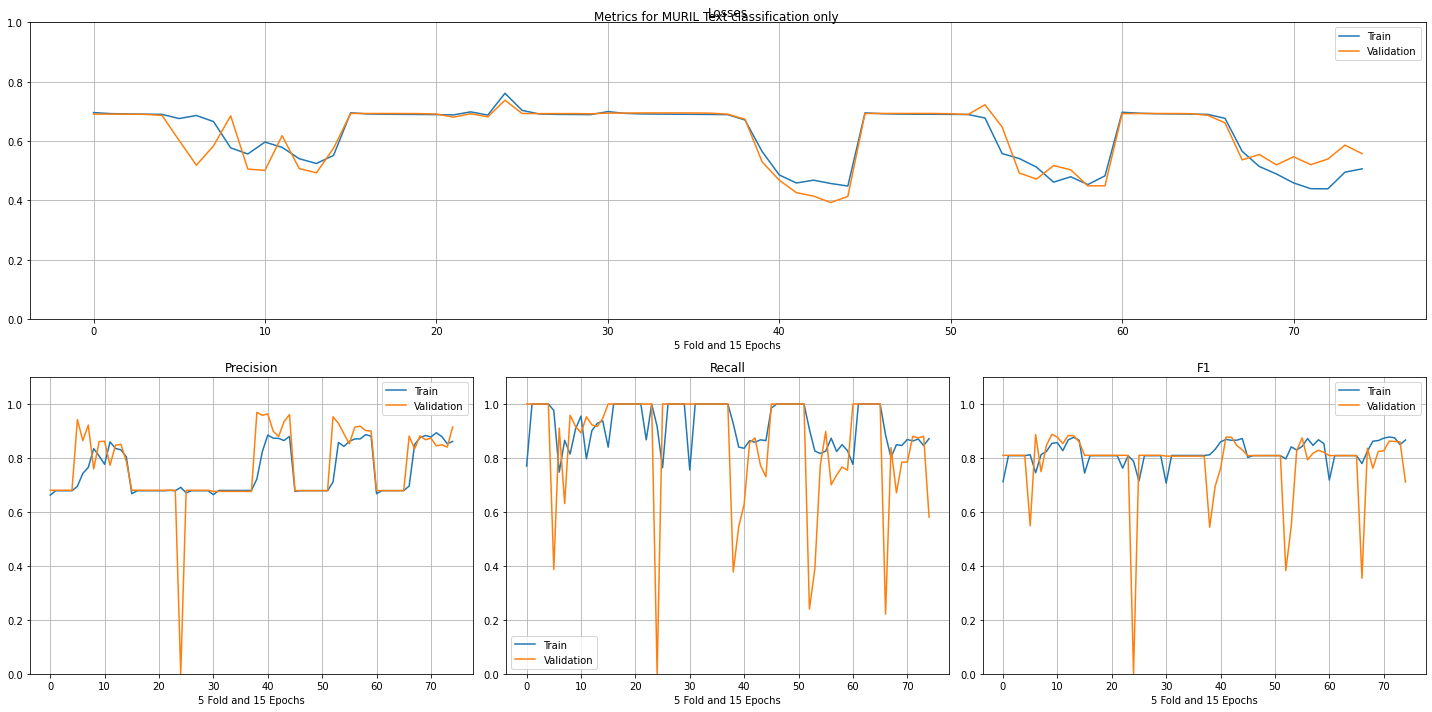

In [9]:
plot_results(txt_only_results[0], 'MURIL Text classification only')

In [10]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.854328,0.887608,0.807181,0.860335,0.907324,0.916667,0.556664,0.505976
6,0.745156,0.886957,0.742942,0.864407,0.747384,0.910714,0.686351,0.518893
12,0.867002,0.883191,0.835180,0.846995,0.901345,0.922619,0.540695,0.507401
13,0.876500,0.882521,0.830214,0.850829,0.928251,0.916667,0.524653,0.493265
11,0.868717,0.877301,0.873303,0.899371,0.864179,0.856287,0.458934,0.426370
...,...,...,...,...,...,...,...,...
5,0.811684,0.548523,0.694681,0.942029,0.976084,0.386905,0.676023,0.601669
8,0.811765,0.543103,0.722093,0.969231,0.926866,0.377246,0.671222,0.673652
7,0.796588,0.382775,0.710773,0.952381,0.905970,0.239521,0.677873,0.722546
6,0.779238,0.354067,0.696009,0.880952,0.885075,0.221557,0.676807,0.661306


In [11]:
mfcc_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MFCC,
                                       k_folds=5, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=1, clip_at=1.0, img_path=IMG_PATH, hidden_dim=200)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


  Batch    50  of     62.
Evaluating
Losses - Train : 0.695 / Validation : 0.688


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 8.302764 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.703 / Validation : 0.683
Time for epoch : 8.63829 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.695 / Validation : 0.684
Time for epoch : 4.269864 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.684
Time for epoch : 4.274614 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.683
Time for epoch : 7.94324 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.682
Time for epoch : 8.05198 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.688 / Validation : 0.680
Time for epoch : 8.10576 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.679
Tim

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time for epoch : 8.120168 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.703 / Validation : 0.693
Time for epoch : 8.07498 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.696 / Validation : 0.694
Time for epoch : 4.274403 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.694
Time for epoch : 4.272203 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.688 / Validation : 0.695
Time for epoch : 4.270773 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.685 / Validation : 0.695
Time for epoch : 4.271258 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.685 / Validation : 0.695
Time for epoch : 4.27326 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.688 / Validation : 0.694
T

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


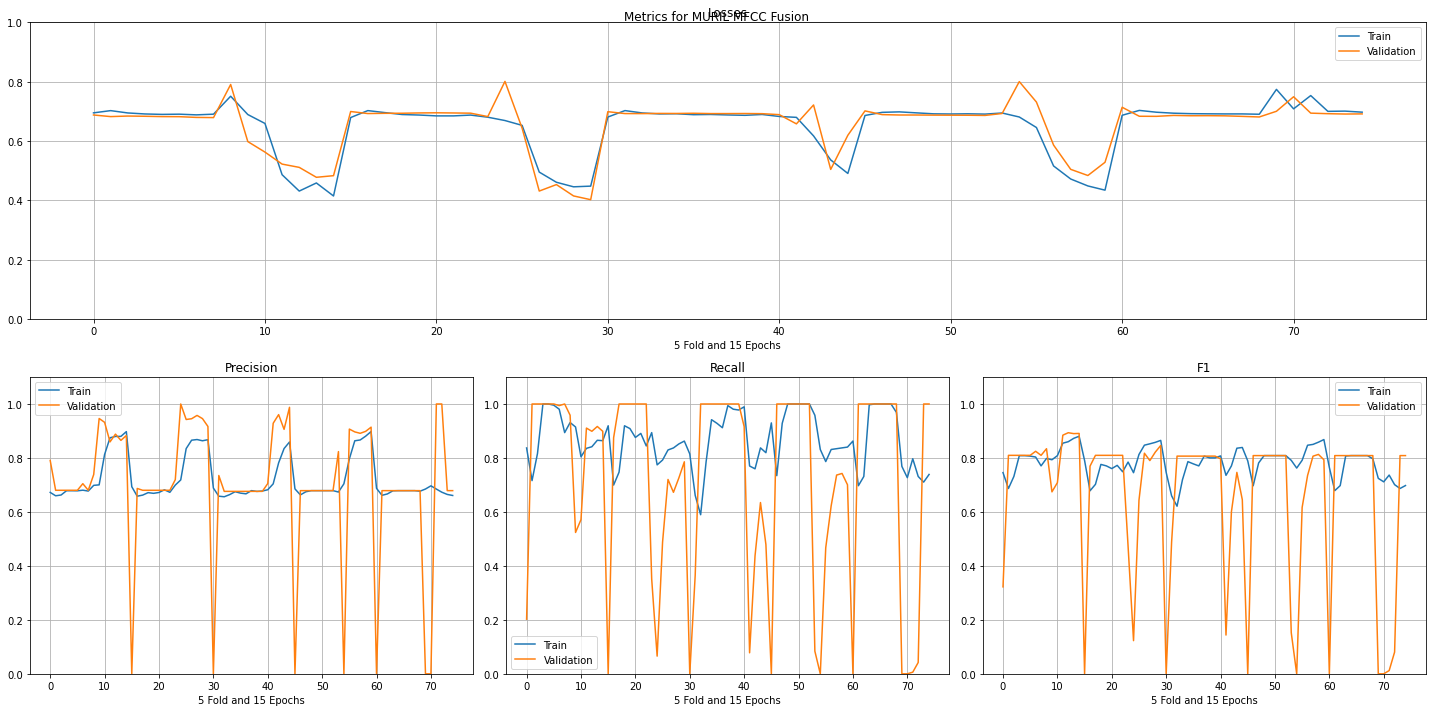

In [12]:
plot_results(mfcc_fusion_results[0], 'MURIL MFCC Fusion')

In [13]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
12,0.860199,0.893491,0.879687,0.888235,0.841555,0.898810,0.431703,0.511549
14,0.880427,0.890855,0.897516,0.883041,0.863976,0.898810,0.415151,0.483573
13,0.872645,0.890173,0.879939,0.865169,0.865471,0.916667,0.459005,0.478112
11,0.854740,0.884393,0.874804,0.859551,0.835575,0.910714,0.486796,0.522590
14,0.865067,0.846154,0.867669,0.916667,0.862481,0.785714,0.448353,0.402661
...,...,...,...,...,...,...,...,...
0,0.765056,0.000000,0.687277,0.000000,0.862687,0.000000,0.687054,0.714099
9,0.762491,0.000000,0.704172,0.000000,0.831343,0.000000,0.681267,0.800535
0,0.746411,0.000000,0.688525,0.000000,0.814925,0.000000,0.681112,0.699152
9,0.724332,0.000000,0.684840,0.000000,0.768657,0.000000,0.774323,0.700542


In [14]:
mel_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MEL,
                                k_folds=5, epochs=15, 
                                balance_classes=True, dropout_level=0.1,
                                lr=6e-4,
                                max_seq_len=MAX_SEQ_LEN,
                                n_layers=1,
                                clip_at=1.0, img_path=IMG_PATH, hidden_dim=64,
                                img_height=80, img_width=80)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:440: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /pytorch/aten/src/ATen/native/Convolution.cpp:660.)
  self.padding, self.dilation, self.groups)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ce

  Batch    50  of     62.
Evaluating
Losses - Train : 0.698 / Validation : 0.691


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 669.135107 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.694 / Validation : 0.691
Time for epoch : 39.019403 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.691
Time for epoch : 38.113601 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.691
Time for epoch : 37.809001 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.691
Time for epoch : 37.50033 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.690
Time for epoch : 37.675239 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.686 / Validation : 0.653
Time for epoch : 38.049173 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.656 / Validation 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    50  of     62.
Evaluating
Losses - Train : 0.661 / Validation : 0.428
Time for epoch : 37.575339 seconds
Epoch 12 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.568 / Validation : 0.557
Time for epoch : 33.42056 seconds
Epoch 13 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.513 / Validation : 0.417
Time for epoch : 37.41322 seconds
Epoch 14 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.470 / Validation : 0.420
Time for epoch : 33.464402 seconds
Epoch 15 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.458 / Validation : 0.402
Time for epoch : 37.483207 seconds
On Train Data
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       317
           1       0.86      0.83      0.85       669

    accuracy                           0.80       986
   macro avg       0.77      0.78      0.77       986
weighted avg       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    50  of     62.
Evaluating
Losses - Train : 0.698 / Validation : 0.692
Time for epoch : 36.925659 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.695 / Validation : 0.693
Time for epoch : 33.16591 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.693
Time for epoch : 32.95152 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.693
Time for epoch : 33.116889 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.693
Time for epoch : 33.176128 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.693
Time for epoch : 33.127446 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.693
Time for epoch : 32.954757 seconds
Epoch 8 / 15
Training 

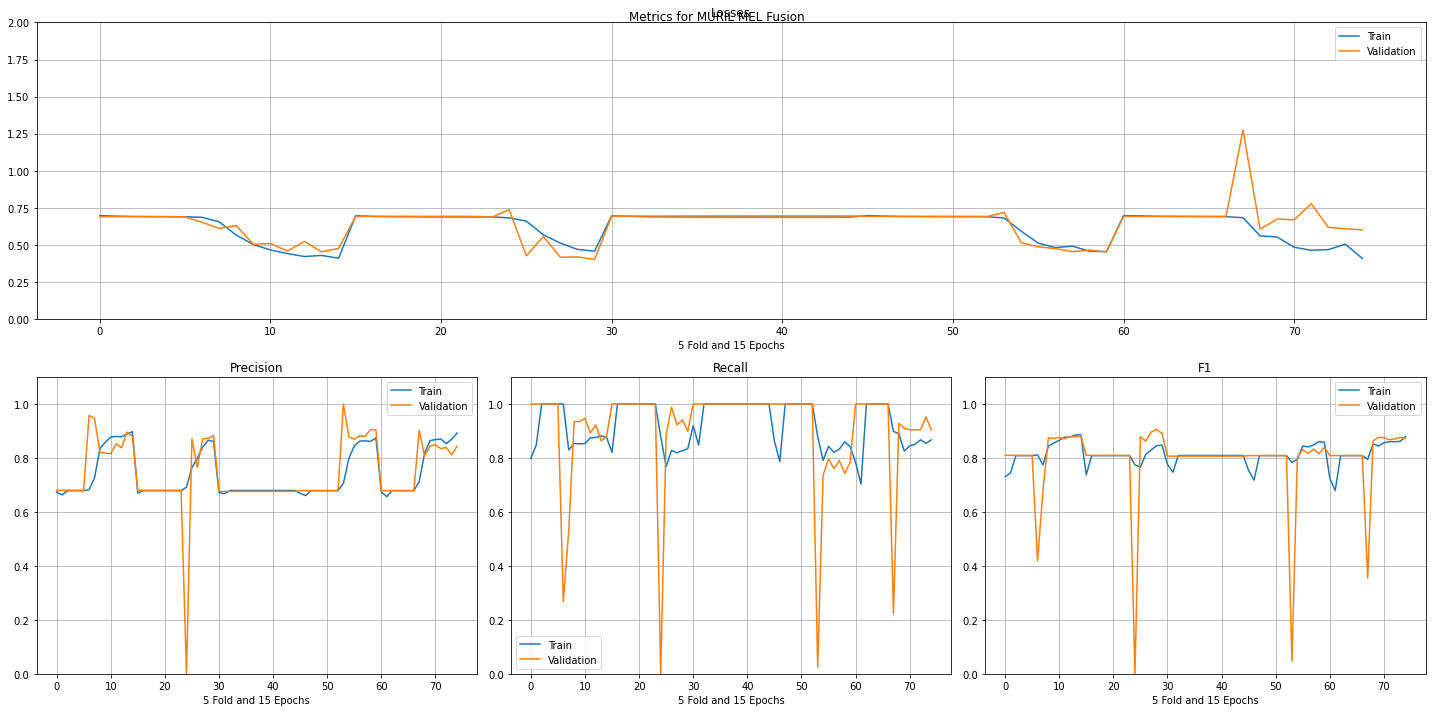

In [15]:
plot_results(mel_fusion_results[0], 'MURIL MEL Fusion')

In [16]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
13,0.845566,0.905444,0.865415,0.872928,0.826607,0.940476,0.470487,0.419803
12,0.829674,0.895954,0.840491,0.870787,0.819133,0.922619,0.512650,0.417386
14,0.847380,0.890855,0.861111,0.883041,0.834081,0.898810,0.458097,0.402395
14,0.886536,0.880952,0.897397,0.880952,0.875934,0.880952,0.410830,0.477310
10,0.766021,0.879056,0.763744,0.871345,0.768311,0.886905,0.660889,0.427571
...,...,...,...,...,...,...,...,...
7,0.774059,0.679389,0.725490,0.946809,0.829596,0.529762,0.656172,0.612193
6,0.811401,0.418605,0.682653,0.957447,1.000000,0.267857,0.686478,0.652959
7,0.794719,0.355769,0.712426,0.902439,0.898507,0.221557,0.683815,1.274855
8,0.783245,0.046784,0.706235,1.000000,0.879104,0.023952,0.682000,0.718736
